## Severe Climate Events: Disaster Declaration for states and counties
Exploratory Data Analysis by Harsh Vardhan Pachisia

In [1]:
import pandas as pd


In [2]:
disasters_raw = pd.read_csv("disaster_declarations.csv")

Understanding the raw data

In [3]:
disasters_raw.head()

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,hash,id,lastRefresh
0,FM-5444-TX,5444,TX,FM,2022-07-19T00:00:00.000Z,2022,Fire,CHALK MOUNTAIN FIRE,0,0,...,NaN,48,221,99221,Hood (County),22060,NaN,373c5ec27998afc08a53302dae796f476b1a6546,867be42a-71d5-4f13-aa21-d91e0a6fd577,2022-07-20T21:21:23.941Z
1,FM-5436-NE,5436,NE,FM,2022-04-23T00:00:00.000Z,2022,Fire,ROAD 702 FIRE,0,0,...,NaN,31,63,99063,Frontier (County),22034,NaN,ea3487ef36cff455236ce4c63d32fb8b5412bcef,e671348b-9782-42df-99f4-d38b8b1a89e6,2022-07-20T21:21:23.942Z
2,FM-5444-TX,5444,TX,FM,2022-07-19T00:00:00.000Z,2022,Fire,CHALK MOUNTAIN FIRE,0,0,...,NaN,48,425,99425,Somervell (County),22060,NaN,1f35dd8137e1b4cf003fb73d53d8aaaf642e6190,40f3ff75-0b80-4d25-8e85-156cd6a6f40b,2022-07-20T21:21:23.943Z
3,FM-5436-NE,5436,NE,FM,2022-04-23T00:00:00.000Z,2022,Fire,ROAD 702 FIRE,0,0,...,NaN,31,65,99065,Furnas (County),22034,NaN,9d813a845ab86f546bdf642fda53d3d4a0fbd098,de47838f-32db-4058-a34c-64997333789e,2022-07-20T21:21:23.943Z
4,FM-5436-NE,5436,NE,FM,2022-04-23T00:00:00.000Z,2022,Fire,ROAD 702 FIRE,0,0,...,NaN,31,145,99145,Red Willow (County),22034,NaN,d436856ce1d5205fa78597b93661fb27d3cea796,483c03b7-160a-414e-bb4f-5ccecc18d94a,2022-07-20T21:21:23.944Z


In [4]:
disasters_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63989 entries, 0 to 63988
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   femaDeclarationString     63989 non-null  object
 1   disasterNumber            63989 non-null  int64 
 2   state                     63989 non-null  object
 3   declarationType           63989 non-null  object
 4   declarationDate           63989 non-null  object
 5   fyDeclared                63989 non-null  int64 
 6   incidentType              63989 non-null  object
 7   declarationTitle          63989 non-null  object
 8   ihProgramDeclared         63989 non-null  int64 
 9   iaProgramDeclared         63989 non-null  int64 
 10  paProgramDeclared         63989 non-null  int64 
 11  hmProgramDeclared         63989 non-null  int64 
 12  incidentBeginDate         63989 non-null  object
 13  incidentEndDate           55609 non-null  object
 14  disasterCloseoutDate  

In [5]:
# keeping only the possibly relevant columns
disasters = disasters_raw[['id','disasterNumber', 'state','fipsStateCode','fipsCountyCode','placeCode','declarationDate','fyDeclared','incidentType',
    'ihProgramDeclared','iaProgramDeclared','paProgramDeclared','hmProgramDeclared',
    'incidentBeginDate','incidentEndDate','designatedArea']]

Understanding the type of disasters present

In [6]:
disasters.incidentType.describe()

count            63989
unique              26
top       Severe Storm
freq             17467
Name: incidentType, dtype: object

In [7]:
disasters.incidentType.value_counts()

Severe Storm         17467
Hurricane            13055
Flood                10634
Biological            7857
Snowstorm             3702
Fire                  3615
Severe Ice Storm      2942
Tornado               1569
Drought               1292
Coastal Storm          638
Other                  307
Freezing               301
Earthquake             227
Typhoon                130
Tropical Storm          54
Volcanic Eruption       51
Fishing Losses          42
Mud/Landslide           37
Winter Storm            13
Dam/Levee Break         13
Toxic Substances         9
Chemical                 9
Tsunami                  9
Human Cause              7
Terrorist                5
Severe Storm(s)          4
Name: incidentType, dtype: int64

Two points of note: 
1. There are non-natural disasters in this data that need to be removed including: 'Biological','Toxic Substances','Chemical','Terrorist','Human Cause','Fishing Losses'. 
2. 'Severe Storms' and 'Severe Storm(s)' are repeated, needs to be checked.

In [8]:
disasters.loc[disasters["incidentType"] == "Severe Storm(s)"]
# only 3 severe storms(s) (based on disaster numbers). 
# check if they overlap with 'Severe Storm'.
disasters.loc[disasters["disasterNumber"] == 4670]
disasters.loc[disasters["disasterNumber"] == 4664]
disasters.loc[disasters["disasterNumber"] == 4672]
# each severe storms(s) overlaps with 'Severe Storm'
# can be removed from the dataset to avoid duplication. 

,id,disasterNumber,state,fipsStateCode,fipsCountyCode,placeCode,declarationDate,fyDeclared,incidentType,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,designatedArea
23681,a43a83c2-7510-4326-8902-c76c15973d4c,4672,AK,2,16,64200,2022-09-23T00:00:00.000Z,2022,Severe Storm,0,0,1,1,2022-09-15T00:00:00.000Z,2022-09-20T00:00:00.000Z,Pribilof Island Regional Educational Attendanc...
44180,ddbab9c1-0745-4cbe-9c5e-208720c75778,4672,AK,2,0,0,2022-09-23T00:00:00.000Z,2022,Severe Storm(s),0,0,1,0,2022-09-15T00:00:00.000Z,2022-09-20T00:00:00.000Z,Statewide
44206,d5b9927b-cc85-48cf-bf93-ad1956b45b4c,4672,AK,2,180,6362,2022-09-23T00:00:00.000Z,2022,Severe Storm,1,0,1,1,2022-09-15T00:00:00.000Z,2022-09-20T00:00:00.000Z,Bering Strait Regional Educational Attendance ...
44233,3558214a-9c3e-4834-af38-d1cde648fd0d,4672,AK,2,270,37840,2022-09-23T00:00:00.000Z,2022,Severe Storm,1,0,1,1,2022-09-15T00:00:00.000Z,2022-09-20T00:00:00.000Z,Kashunamiut Regional Educational Attendance Area
44259,5b16d89e-f5de-4e66-8ad2-0911733af907,4672,AK,2,50,45690,2022-09-23T00:00:00.000Z,2022,Severe Storm,1,0,1,1,2022-09-15T00:00:00.000Z,2022-09-20T00:00:00.000Z,Lower Yukon Regional Educational Attendance Area
44284,8f381b32-2e35-437c-9a7d-c52a08d9a44e,4672,AK,2,50,45540,2022-09-23T00:00:00.000Z,2022,Severe Storm,1,0,1,1,2022-09-15T00:00:00.000Z,2022-09-20T00:00:00.000Z,Lower Kuskokwim Regional Educational Attendanc...


Calculating the number of disasters by incident type and removing the ones that are not climate disasters. 

In [9]:
disaster_type_list = disasters.incidentType.unique().tolist()
disaster_type_list
#removing severe storm(s) since they are only 3 which are statewide emergencies that are already covered by severe storm- duplicates
unwanted_disasters = ['Biological','Toxic Substances','Chemical','Terrorist','Human Cause','Fishing Losses', 'Severe Storm(s)']
climate_disasters_list = [ele for ele in disaster_type_list if ele not in unwanted_disasters]
climate_disasters = disasters.loc[disasters['incidentType'].isin(climate_disasters_list)]

Checking for state-wide disasters that can be removed if they are already covered by a county, to ensure that county codes of 0 are not kept in the dataset. 

In [10]:
state_wide_disasters = disasters.loc[disasters["designatedArea"] == "Statewide"]
#state_wide_disasters
#state_wide_disasters_no_dupl = state_wide_disasters.drop_duplicates(subset='disasterNumber', keep="first")
#state_wide_disasters_no_dupl
state_wide_disasters

,id,disasterNumber,state,fipsStateCode,fipsCountyCode,placeCode,declarationDate,fyDeclared,incidentType,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,designatedArea
409,0a47cc92-3705-4331-8c1a-da55a165c7fd,5133,CO,8,0,0,2016-07-10T00:00:00.000Z,2016,Fire,0,0,1,0,2016-07-09T00:00:00.000Z,2016-07-14T00:00:00.000Z,Statewide
8725,bdfa7fae-eb8d-4346-8025-f1b219c5eb50,4027,RI,44,0,0,2011-09-03T00:00:00.000Z,2011,Hurricane,0,0,0,1,2011-08-27T00:00:00.000Z,2011-08-29T00:00:00.000Z,Statewide
12662,e15d091a-0c63-4068-803e-53dd0ff97c6b,3459,LA,22,0,0,2020-03-13T00:00:00.000Z,2020,Biological,0,0,1,0,2020-01-20T00:00:00.000Z,NaN,Statewide
16766,a96786fe-4a6c-47b8-b88c-d1bdb595bf77,3356,PA,42,0,0,2012-10-29T00:00:00.000Z,2013,Hurricane,0,0,1,0,2012-10-26T00:00:00.000Z,2012-11-08T00:00:00.000Z,Statewide
19398,f785e0d8-789e-4e0c-9814-42dce97e7c18,3281,MO,29,0,0,2007-12-12T00:00:00.000Z,2008,Severe Ice Storm,0,0,1,0,2007-12-08T00:00:00.000Z,2007-12-15T00:00:00.000Z,Statewide
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63896,f0d98626-e256-4cdf-b264-510b0e51570d,182,MT,30,0,0,1964-12-18T00:00:00.000Z,1965,Snowstorm,0,1,1,1,1964-12-18T00:00:00.000Z,1964-12-18T00:00:00.000Z,Statewide
63897,68a9f1c4-37f2-44cd-a97a-0e52dbe5acf2,104,OK,40,0,0,1960-07-15T00:00:00.000Z,1960,Severe Storm,0,1,1,1,1960-07-15T00:00:00.000Z,1960-07-15T00:00:00.000Z,Statewide
63898,4b63b1ea-09ee-40a1-bda9-2bc3326e8054,58,PA,42,0,0,1956-05-21T00:00:00.000Z,1956,Severe Storm,0,1,1,1,1956-05-21T00:00:00.000Z,1956-05-21T00:00:00.000Z,Statewide
63942,6ce9a6f2-7a9a-4ac4-bf4a-86cc91c23590,56,NC,37,0,0,1956-04-24T00:00:00.000Z,1956,Severe Storm,0,1,1,1,1956-04-24T00:00:00.000Z,1956-04-24T00:00:00.000Z,Statewide


### Subsetting the data to the last 23 years (2000-2022). 

In [11]:
climate_disasters["declarationDate"] = pd.to_datetime(climate_disasters["declarationDate"])

# adding a year column
climate_disasters['Year'] = climate_disasters['declarationDate'].dt.strftime('%Y')

/tmp/user/23091/ipykernel_3174606/2056361503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_disasters["declarationDate"] = pd.to_datetime(climate_disasters["declarationDate"])
/tmp/user/23091/ipykernel_3174606/2056361503.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_disasters['Year'] = climate_disasters['declarationDate'].dt.strftime('%Y')


In [12]:
# subsetting the data
climate_last_23 = climate_disasters.loc[(climate_disasters['Year'] >= '2000')
                     & (climate_disasters['Year'] <= '2023')]
climate_last_23

,id,disasterNumber,state,fipsStateCode,fipsCountyCode,placeCode,declarationDate,fyDeclared,incidentType,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,designatedArea,Year
0,867be42a-71d5-4f13-aa21-d91e0a6fd577,5444,TX,48,221,99221,2022-07-19 00:00:00+00:00,2022,Fire,0,0,1,1,2022-07-18T00:00:00.000Z,NaN,Hood (County),2022
1,e671348b-9782-42df-99f4-d38b8b1a89e6,5436,NE,31,63,99063,2022-04-23 00:00:00+00:00,2022,Fire,0,0,1,1,2022-04-22T00:00:00.000Z,NaN,Frontier (County),2022
2,40f3ff75-0b80-4d25-8e85-156cd6a6f40b,5444,TX,48,425,99425,2022-07-19 00:00:00+00:00,2022,Fire,0,0,1,1,2022-07-18T00:00:00.000Z,NaN,Somervell (County),2022
3,de47838f-32db-4058-a34c-64997333789e,5436,NE,31,65,99065,2022-04-23 00:00:00+00:00,2022,Fire,0,0,1,1,2022-04-22T00:00:00.000Z,NaN,Furnas (County),2022
4,483c03b7-160a-414e-bb4f-5ccecc18d94a,5436,NE,31,145,99145,2022-04-23 00:00:00+00:00,2022,Fire,0,0,1,1,2022-04-22T00:00:00.000Z,NaN,Red Willow (County),2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58987,e5a603dd-b504-45f9-b30b-cfe7694f1055,1311,GA,13,223,99223,2000-01-28 00:00:00+00:00,2000,Severe Storm,0,0,1,1,2000-01-22T00:00:00.000Z,2000-02-01T00:00:00.000Z,Paulding (County),2000
59018,f607f5c6-1f6f-4ff7-a7f0-bda45598c22a,1311,GA,13,187,99187,2000-01-28 00:00:00+00:00,2000,Severe Storm,0,0,1,1,2000-01-22T00:00:00.000Z,2000-02-01T00:00:00.000Z,Lumpkin (County),2000
59019,5a26214d-7749-4d1f-968d-c7f00cd6b72e,1311,GA,13,311,99311,2000-01-28 00:00:00+00:00,2000,Severe Storm,0,0,1,1,2000-01-22T00:00:00.000Z,2000-02-01T00:00:00.000Z,White (County),2000
59053,a01f3466-8390-46ed-bc53-5304f1d9f54a,1311,GA,13,231,99231,2000-01-28 00:00:00+00:00,2000,Severe Storm,0,0,1,1,2000-01-22T00:00:00.000Z,2000-02-01T00:00:00.000Z,Pike (County),2000


If we take all years- we have 52,445 counties that have been affected by climate-related disasters. If we take from 2000 onwards (2000-2022 included), we get 36,340 counties that have been affected by climate-related disasters. 

In [13]:
#Renaming climate columns
climate_last_23.columns = ['record_id', 'disaster_number', 'state', 'state_code',
                          'county_code','place_code','dec_date', 'fiscal_year',
                        'disaster_type','ih_program','ia_program', 'pa_program',
                        'hm_progam','begin_date', 'end_date', 'area_name','year']
cliate_last_23 = climate_last_23.drop(columns=['fiscal_year'])
# checking for duplicate rows
duplicateRows = climate_last_23[climate_last_23.duplicated(['record_id'])]
len(duplicateRows)

0

In [14]:
climate_last_23 = climate_last_23.drop(columns=['record_id'])

Does not look like there are any duplicates that we need to worry about. 
Hence, dropping the record_id column.

### Deciding on economic assistance program to analyze. 

In [15]:
total_number_of_counties_affected = climate_last_23.shape[0]
climate_last_23.hm_progam.value_counts()/total_number_of_counties_affected

1    0.613478
0    0.386522
Name: hm_progam, dtype: float64

In [16]:
climate_last_23.ih_program.value_counts()/total_number_of_counties_affected

0    0.817403
1    0.182597
Name: ih_program, dtype: float64

In [17]:
climate_last_23.ia_program.value_counts()/total_number_of_counties_affected

0    0.864645
1    0.135355
Name: ia_program, dtype: float64

In [18]:
climate_last_23.pa_program.value_counts()/total_number_of_counties_affected

1    0.941394
0    0.058606
Name: pa_program, dtype: float64

Hazard Mitigation declared: 61.34%

Individual and Households: 81.71%

Individual Assistance: 86.46%

Public Assistance: 94.13%

Keeping only Public assistance column as it has the highest coverage in our dataset, is the largest program under FEMA, and hence, has the largest economic impact. 



In [19]:
climate_last_23 = climate_last_23.drop(columns=['ih_program','ia_program','hm_progam'])

Questions to answer:

1. What are the type of disasters that are occuring?

2. What % of disasters are getting some kind of economic assistance?

- Where does that economic assistance acctually flow to- which states?

3. Which months are causing what kind of disasters? Which month has the most disasters?

4. Which counties face the most disasters? 

5. Can add the public assistance data- map it to the specific disasters-
based on disaster numbers. See how much money goes to each state. Which kind of disaster gets the most amount of money as well. 
Use public assistance cause it is the largest grant that FEMA provides. 



### Creating a final county code to merge it with the census data. 

In [20]:
#remove records that have 0's in the county code- they are ones that are 
# state-wide disasters and are already covered by other rows. 
climate_last_23.drop(climate_last_23[climate_last_23['county_code'] == 0].index,
                          inplace = True)

Adding final_county_code by cleaning state code and county_code and merging them
together. 

In [21]:
climate_last_23["state_code"] = climate_last_23.state_code.map("{:02d}".format)

In [22]:
climate_last_23["county_code"] = climate_last_23.county_code.map("{:03d}".format)

In [23]:
climate_last_23['full_county_code'] = climate_last_23['state_code'] + climate_last_23['county_code']
climate_last_23.head()

,disaster_number,state,state_code,county_code,place_code,dec_date,fiscal_year,disaster_type,pa_program,begin_date,end_date,area_name,year,full_county_code
0,5444,TX,48,221,99221,2022-07-19 00:00:00+00:00,2022,Fire,1,2022-07-18T00:00:00.000Z,NaN,Hood (County),2022,48221
1,5436,NE,31,063,99063,2022-04-23 00:00:00+00:00,2022,Fire,1,2022-04-22T00:00:00.000Z,NaN,Frontier (County),2022,31063
2,5444,TX,48,425,99425,2022-07-19 00:00:00+00:00,2022,Fire,1,2022-07-18T00:00:00.000Z,NaN,Somervell (County),2022,48425
3,5436,NE,31,065,99065,2022-04-23 00:00:00+00:00,2022,Fire,1,2022-04-22T00:00:00.000Z,NaN,Furnas (County),2022,31065
4,5436,NE,31,145,99145,2022-04-23 00:00:00+00:00,2022,Fire,1,2022-04-22T00:00:00.000Z,NaN,Red Willow (County),2022,31145


### What are the type of disasters and frequency of disasters?

In [24]:
#How many disasters have we had?
climate_last_23.disaster_number.value_counts()
# Have had 2811 disasters 

1624    254
3216    254
3261    254
3554    254
1606    254
       ... 
2735      1
2731      1
1449      1
2715      1
3581      1
Name: disaster_number, Length: 2765, dtype: int64

In [25]:
cl= climate_last_23.disaster_number.value_counts().to_dict()
climate_last_23['number_of_counties_affected'] = climate_last_23['disaster_number'].map(cl)

In [26]:
#only keep one county row per disaster- since we just need to find the total number of events
climate_last_23_summary = climate_last_23.drop(columns=['dec_date','fiscal_year','pa_program','begin_date', 'end_date', 'area_name','full_county_code'])
climate_last_23_summary = climate_last_23_summary.drop_duplicates(subset='disaster_number', keep="first")
climate_last_23_summary = climate_last_23_summary.drop(columns=['disaster_number','state_code','county_code','number_of_counties_affected'])
#climate_last_23_summary= climate_last_23_summary.drop('disaster_number',axis=1)
#climate_last_23_summary
climate_last_23_summary= climate_last_23_summary[['year','state','disaster_type']]
climate_last_23_summary
climate_last_23_summary.duplicated()
climate_last_23_summary= climate_last_23_summary.groupby(climate_last_23_summary.columns.tolist(),as_index=False).size()
climate_last_23_summary.rename(columns = {"size": "total_number_of_events"}, inplace = True)
climate_last_23_summary


,year,state,disaster_type,total_number_of_events
0,2000,AK,Severe Storm,1
1,2000,AL,Fire,1
2,2000,AL,Severe Storm,3
3,2000,AR,Severe Ice Storm,2
4,2000,AZ,Severe Storm,1
...,...,...,...,...
1392,2023,CA,Flood,2
1393,2023,GA,Severe Storm,1
1394,2023,ND,Snowstorm,1
1395,2023,OR,Fire,1


In [27]:
import plotly as px
climate_last_23_summary=climate_last_23_summary.sort_values("year") # Make sure you sort the time horizon column in ascending order because this column is in random order in the raw dataset

fig = px.choropleth(climate_last_23_summary,
                    locations='state', 
                    locationmode="USA-states", 
                    color='total_number_of_events',
                    color_continuous_scale="Viridis_r", 
                    scope="usa",
                    animation_frame='year') #make sure 'period_begin' is string type and sorted in ascending order

fig.show()

ModuleNotFoundError: No module named 'plotly'

### Which disasters go on for a long time?

In [ ]:
climate_last_23['end_date']= pd.to_datetime(climate_last_23['end_date'])
climate_last_23['begin_date']= pd.to_datetime(climate_last_23['begin_date'])

climate_last_23['length_of_disaster'] = (climate_last_23['end_date'] - 
                                         climate_last_23['begin_date']).dt.days

In [ ]:
#climate_last_23.full_county_code.value_counts()
climate_dict = {k: f.groupby('disaster_number')['year'].unique().apply(list).to_dict()
     for k, f in climate_last_23.groupby('disaster_type')}
climate_dict

{'Coastal Storm': {1379: ['2001'],
  1380: ['2001'],
  1393: ['2001'],
  1434: ['2002'],
  3223: ['2005'],
  3224: ['2005'],
  3227: ['2005'],
  3228: ['2005'],
  3234: ['2005'],
  3247: ['2005'],
  3416: ['2019'],
  3527: ['2020'],
  3574: ['2021'],
  4041: ['2011'],
  4244: ['2015'],
  4367: ['2018'],
  4369: ['2018'],
  4370: ['2018'],
  4647: ['2022']},
 'Dam/Levee Break': {1529: ['2004'],
  3381: ['2017'],
  3525: ['2020'],
  4547: ['2020']},
 'Drought': {3276: ['2007']},
 'Earthquake': {1342: ['2000'],
  1361: ['2001'],
  1397: ['2001'],
  1415: ['2002'],
  1440: ['2002'],
  1505: ['2004'],
  1664: ['2006'],
  1859: ['2009'],
  1911: ['2010'],
  3410: ['2018'],
  3415: ['2019'],
  3426: ['2020'],
  4042: ['2011'],
  4044: ['2011'],
  4193: ['2014'],
  4413: ['2019'],
  4473: ['2020'],
  4548: ['2020']},
 'Fire': {1329: ['2000'],
  1340: ['2000'],
  1341: ['2000'],
  1391: ['2001'],
  1421: ['2002'],
  1422: ['2002'],
  1477: ['2003'],
  1498: ['2003'],
  1540: ['2004'],
  1623: [

In [125]:
from climate_datasets import *

In [110]:
cleaned_data = get_cleaned_data("disaster_declarations.csv", False)

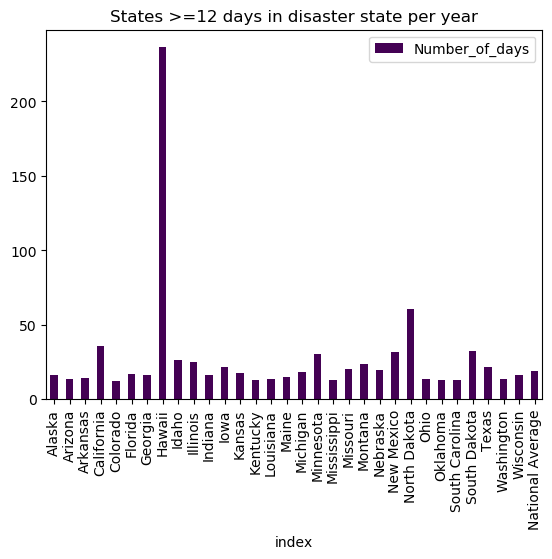

In [111]:
days_in_disaster = number_of_days_in_dec_disaster(cleaned_data)
data= pd.Series(days_in_disaster).to_frame('Number_of_days').reset_index()
##data = pd.DataFrame(days_in_disaster, index= [0])
#data
data_subset = data.loc[(data['Number_of_days'] >= 12)]
data_subset.plot(kind='bar', x='index', 
                 title = 'States >=12 days in disaster state per year', 
                 colormap = 'viridis')

In [130]:
def change_in_frequency(climate_summary):
    '''
    Takes a pandas dataframe and returns the sum of all disasters taking place
    each year nationwide to compare across time.
    '''
    climate_by_state = climate_summary.groupby(
        ['state_name','disaster_type','year'], as_index = False)[
        'total_number_of_events'].sum()

    climate_by_state = climate_by_state.groupby(
        ['disaster_type','year'], as_index = False)['total_number_of_events'].sum()

    return climate_by_state

In [134]:
t = change_in_frequency(number_of_disaster_events_by_state(cleaned_data))
t.columns
t.to_markdown()#t.plot.bar(x="year", y="total_number_of_events")
#z = t.loc[(t['year'] >= '2000')
                    # & (t['year'] < '2023')]
#z.plot.bar(x="year", y="total_number_of_events",stacked=True)
#s= t.loc[(t['disaster_type'] == 'Severe Storm')]
#t['disaster_type'].value_counts()


'|     | disaster_type     |   year |   total_number_of_events |\n|----:|:------------------|-------:|-------------------------:|\n|   0 | Coastal Storm     |   1980 |                        1 |\n|   1 | Coastal Storm     |   1983 |                        1 |\n|   2 | Coastal Storm     |   1991 |                        3 |\n|   3 | Coastal Storm     |   1992 |                        1 |\n|   4 | Coastal Storm     |   1993 |                        1 |\n|   5 | Coastal Storm     |   1998 |                        1 |\n|   6 | Coastal Storm     |   2001 |                        3 |\n|   7 | Coastal Storm     |   2002 |                        1 |\n|   8 | Coastal Storm     |   2005 |                        6 |\n|   9 | Coastal Storm     |   2011 |                        1 |\n|  10 | Coastal Storm     |   2015 |                        1 |\n|  11 | Coastal Storm     |   2018 |                        3 |\n|  12 | Coastal Storm     |   2019 |                        1 |\n|  13 | Coastal Storm   

In [70]:
pop_2000_2009 = pd.read_csv("state_pop_2000_2009.csv")
pop_2000_2009.dropna(axis=0,inplace= True)
name_list = ['state'] + list(range(2000,2010))
name_list = [str(i) for i in name_list]
pop_2000_2009.drop(columns=pop_2000_2009.columns[-2:], axis=1, inplace=True)
pop_2000_2009.drop(columns=pop_2000_2009.columns[1], axis=1, inplace=True)
pop_2000_2009.columns 
pop_2000_2009.columns = name_list
pop_2000_2009
pop_2000_2009['state']=pop_2000_2009["state"].str.replace(".","", regex= True)
pop_2000_2009

def get_state_names(raw_file_path):
    '''
    Inputs a raw file of state codes and outputs a pandas dataframe with
    the 2 letter state codes and the state name.
    '''
    state_code_lookup_raw = pd.read_csv(raw_file_path,sep='|')
    state_code_lookup_raw.drop(columns=['STATE',
        'STATENS'], inplace=True)
    state_names =  state_code_lookup_raw.rename(
        columns={"STATE_NAME": "state_name", "STUSAB": "state"})
    
    return state_names

state_names = get_state_names('Census_State_codes.txt')
state_name_list = state_names.state_name.values.tolist()

pop_2000_2009 = pop_2000_2009.loc[pop_2000_2009['state']
                                      .isin(state_name_list)]
pop_2000_2009

,state,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
8,Alabama,"4,452,173","4,467,634","4,480,089","4,503,491","4,530,729","4,569,805","4,628,981","4,672,840","4,718,206","4,757,938"
9,Alaska,"627,963","633,714","642,337","648,414","659,286","666,946","675,302","680,300","687,455","698,895"
10,Arizona,"5,160,586","5,273,477","5,396,255","5,510,364","5,652,404","5,839,077","6,029,141","6,167,681","6,280,362","6,343,154"
11,Arkansas,"2,678,588","2,691,571","2,705,927","2,724,816","2,749,686","2,781,097","2,821,761","2,848,650","2,874,554","2,896,843"
12,California,"33,987,977","34,479,458","34,871,843","35,253,159","35,574,576","35,827,943","36,021,202","36,250,311","36,604,337","36,961,229"
13,Colorado,"4,326,921","4,425,687","4,490,406","4,528,732","4,575,013","4,631,888","4,720,423","4,803,868","4,889,730","4,972,195"
14,Connecticut,"3,411,777","3,432,835","3,458,749","3,484,336","3,496,094","3,506,956","3,517,460","3,527,270","3,545,579","3,561,807"
15,Delaware,"786,373","795,699","806,169","818,003","830,803","845,150","859,268","871,749","883,874","891,730"
16,District of Columbia,"572,046","574,504","573,158","568,502","567,754","567,136","570,681","574,404","580,236","592,228"
17,Florida,"16,047,515","16,356,966","16,689,370","17,004,085","17,415,318","17,842,038","18,166,990","18,367,842","18,527,305","18,652,644"


In [94]:
pop_2010_2019 = pd.read_csv("state_pop_2010_2019.csv")

pop_2010_2019.dropna(axis=0,inplace= True)
pop_2010_2019.drop(columns=pop_2010_2019.columns[1:3], axis=1, inplace=True)
name_list = ['state'] + list(range(2010,2020))
name_list = [str(i) for i in name_list]
pop_2010_2019.columns = name_list
pop_2010_2019["state"]= pop_2010_2019["state"].str.replace(".","", regex= True)

state_names = get_state_names('Census_State_codes.txt')
state_name_list = state_names.state_name.values.tolist()
pop_2010_2019 = pop_2010_2019.loc[pop_2010_2019['state']
                                      .isin(state_name_list)]
pop_2010_2019

,state,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
8,Alabama,"4,785,437","4,799,069","4,815,588","4,830,081","4,841,799","4,852,347","4,863,525","4,874,486","4,887,681","4,903,185"
9,Alaska,"713,910","722,128","730,443","737,068","736,283","737,498","741,456","739,700","735,139","731,545"
10,Arizona,"6,407,172","6,472,643","6,554,978","6,632,764","6,730,413","6,829,676","6,941,072","7,044,008","7,158,024","7,278,717"
11,Arkansas,"2,921,964","2,940,667","2,952,164","2,959,400","2,967,392","2,978,048","2,989,918","3,001,345","3,009,733","3,017,804"
12,California,"37,319,502","37,638,369","37,948,800","38,260,787","38,596,972","38,918,045","39,167,117","39,358,497","39,461,588","39,512,223"
13,Colorado,"5,047,349","5,121,108","5,192,647","5,269,035","5,350,101","5,450,623","5,539,215","5,611,885","5,691,287","5,758,736"
14,Connecticut,"3,579,114","3,588,283","3,594,547","3,594,841","3,594,524","3,587,122","3,578,141","3,573,297","3,571,520","3,565,287"
15,Delaware,"899,593","907,381","915,179","923,576","932,487","941,252","948,921","956,823","965,479","973,764"
16,District of Columbia,"605,226","619,800","634,924","650,581","662,328","675,400","685,815","694,906","701,547","705,749"
17,Florida,"18,845,537","19,053,237","19,297,822","19,545,621","19,845,911","20,209,042","20,613,477","20,963,613","21,244,317","21,477,737"


In [104]:
pop_2020_2022 = pd.read_csv("state_pop_2020_2022.csv")
pop_2020_2022.dropna(axis=0,inplace= True)
pop_2020_2022
pop_2020_2022.drop(columns=pop_2020_2022.columns[1], axis=1, inplace=True)
name_list = ['state'] + list(range(2020,2023))
name_list = [str(i) for i in name_list]
pop_2020_2022.columns = name_list
pop_2020_2022["state"]=pop_2020_2022["state"].str.replace(".","", regex= True)

state_names = get_state_names('Census_State_codes.txt')
state_name_list = state_names.state_name.values.tolist()
state_name_list.append("United States")
pop_2020_2022 = pop_2020_2022.loc[pop_2020_2022['state']
                                      .isin(state_name_list)]
pop_2020_2022


,state,2020,2021,2022
3,United States,"331,511,512","332,031,554","333,287,557"
8,Alabama,"5,031,362","5,049,846","5,074,296"
9,Alaska,"732,923","734,182","733,583"
10,Arizona,"7,179,943","7,264,877","7,359,197"
11,Arkansas,"3,014,195","3,028,122","3,045,637"
12,California,"39,501,653","39,142,991","39,029,342"
13,Colorado,"5,784,865","5,811,297","5,839,926"
14,Connecticut,"3,597,362","3,623,355","3,626,205"
15,Delaware,"992,114","1,004,807","1,018,396"
16,District of Columbia,"670,868","668,791","671,803"
